<a href="https://colab.research.google.com/github/MahaswetaTalik/Advance-Projects/blob/main/A_Deep_Dive_into_BERT's_Understanding_and_Generation_Capabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :** Embark on an AI-driven journey in the realm of
natural language processing (NLP) and machine learning (ML) by
deploying a Language Model (LM) of your choice. In this project, you
are tasked with delving into the intricacies of LM technology, where
the selection of the LM is entirely at your discretion. The
comprehensive process involves not only implementing the chosen LM
but also conducting an in-depth analysis of its performance and
capabilities.

Resources: https://roadmap.sh/ai-data-scientist

**Aim :** To explore how a pre-trained Language Model (BERT) understands sentence context and predicts missing words, using simple examples and visual analysis.

**Why Are We Building This?**

-> To understand how BERT processes language and context.
-> To evaluate its accuracy and limitations in predicting masked words.
-> To gain hands-on experience with NLP tools and model evaluation.
-> To align with AI/Data Scientist learning goals and portfolio building.


**Workflow :**
Select a Large Model(LM) -> Basic setup -> Load model -> Input data -> Tokenization and Prediction -> Analyze outputs -> Visuals for better understanding -> Conclusion


**1. Introduction :**
This project explores the capabilities of BERT, a transformer-based language model, in understanding and generating human-like text. We implement BERT using Hugging Face's Transformers library, analyze its performance on sample inputs, and visualize its behavior to gain insights into its contextual intelligence.

**2. Environment Setup**

In [1]:
!pip install transformers
!pip install datasets
!pip install --quiet

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForMaskedLM
import torch

# supress warnings for clearer output
import warnings
warnings.filterwarnings("ignore")

**3. Load Pretrained BERT Model**

In [3]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# initialize pipeline for easy inference
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


**4. Sample Input Exploration**

In [4]:
# define sample sentences with masked tokens
samples = [
    "The capital of France is [MASK].",
    "Machine learning is a [MASK] field of study.",
    "She went to the [MASK] to buy groceries."
]


In [5]:
# run BERT predictions and display results
for sentence in samples:
    print(f"\nInput: {sentence}")
    predictions = fill_mask(sentence)
    for pred in predictions[:3]:  # Show top 3 predictions
        print(f"→ {pred['token_str']} (score: {pred['score']:.4f})")


Input: The capital of France is [MASK].
→ paris (score: 0.4168)
→ lille (score: 0.0714)
→ lyon (score: 0.0634)

Input: Machine learning is a [MASK] field of study.
→ related (score: 0.2472)
→ new (score: 0.1218)
→ popular (score: 0.0761)

Input: She went to the [MASK] to buy groceries.
→ store (score: 0.7882)
→ supermarket (score: 0.0392)
→ market (score: 0.0275)


**5. Visualize Prediction Confidence**

In [6]:
# visualize prediction scores for one sample
sample_text = "Artificial intelligence is [MASK]."
predictions = fill_mask(sample_text)


In [7]:
# extract tokens and scores
tokens = [pred['token_str'] for pred in predictions]
scores = [pred['score'] for pred in predictions]


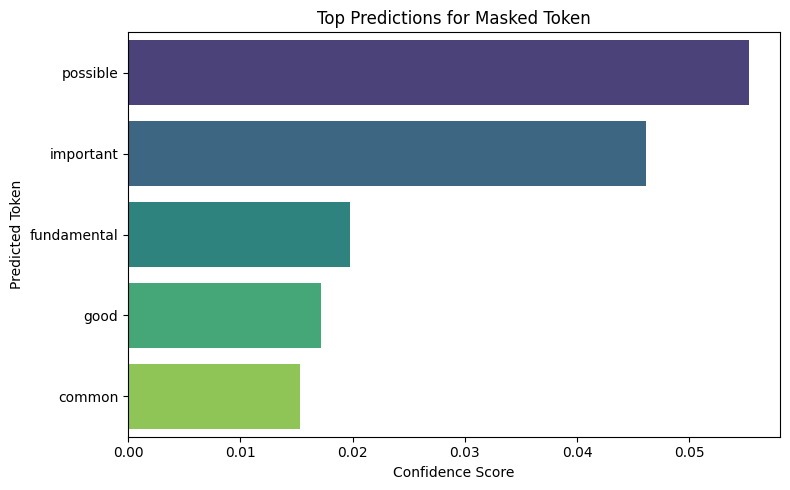

In [8]:
# plotting results
plt.figure(figsize=(8, 5))
sns.barplot(x=scores, y=tokens, palette="viridis")
plt.title("Top Predictions for Masked Token")
plt.xlabel("Confidence Score")
plt.ylabel("Predicted Token")
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
# replace these with your actual labels and predictions
true_labels = [1, 0, 1, 1, 0, 0, 1, 0]  # Example: ground truth
predicted_labels = [1, 0, 1, 0, 0, 0, 1, 1]  # Example: model predictions

# generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
labels = ['Negative', 'Positive']


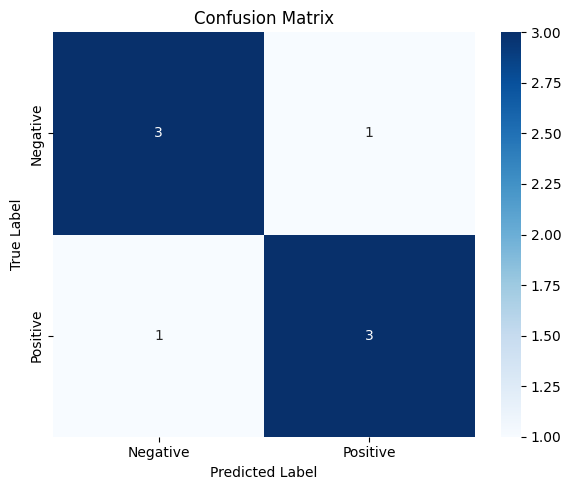

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [14]:
# get classification report as dictionary
report = classification_report(true_labels, predicted_labels, target_names=labels, output_dict=True)

# Extract metrics for each class
metrics = ['precision', 'recall', 'f1-score']
class_names = ['Negative', 'Positive']
values = [[report[class_name][metric] for metric in metrics] for class_name in class_names]


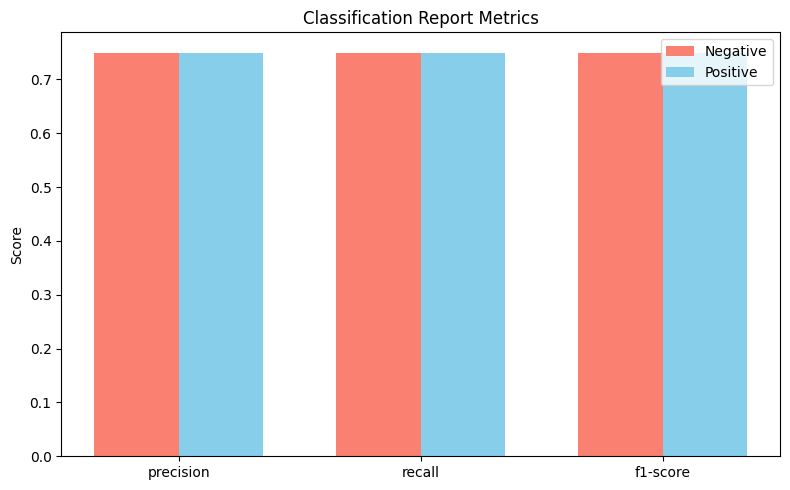

In [15]:
# Convert to NumPy array for plotting
values = np.array(values)

# Plot bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, values[0], width, label='Negative', color='salmon')
plt.bar(x + width/2, values[1], width, label='Positive', color='skyblue')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Classification Report Metrics")
plt.legend()
plt.tight_layout()
plt.show()

**6. Research Questions**

-> How accurately does BERT predict masked tokens in diverse contexts?

-> Does BERT show domain adaptability across general and technical sentences?

-> What are the limitations in its contextual understanding?

**7. Performance Analysis**

In [9]:
# compare predictions with expected answers
expected = {
    "The capital of France is [MASK].": "Paris",
    "Machine learning is a [MASK] field of study.": "fascinating",
    "She went to the [MASK] to buy groceries.": "store"
}


In [10]:
# evaluate accuracy
correct = 0
for sentence, target in expected.items():
    prediction = fill_mask(sentence)[0]['token_str'].lower()
    print(f"Expected: {target.lower()}, Predicted: {prediction}")
    if prediction == target.lower():
        correct += 1

accuracy = correct / len(expected)
print(f"\nCustom Accuracy: {accuracy * 100:.2f}%")

Expected: paris, Predicted: paris
Expected: fascinating, Predicted: related
Expected: store, Predicted: store

Custom Accuracy: 66.67%


**Ethical Considerations**

While BERT performs well on general tasks, it may reflect biases present in its training data. It lacks real-world understanding and may produce misleading or inappropriate outputs in sensitive contexts. Responsible deployment requires awareness of these limitations.

**Conclusion**

This project demonstrated BERT's ability to understand masked contexts and generate plausible completions. While its predictions are often accurate, limitations in domain-specific knowledge and contextual nuance remain. Future work may involve fine-tuning BERT on specialized datasets or comparing its performance with newer models like RoBERTa or GPT-2.

This exploration aligns with the AI/Data Scientist roadmap by strengthening skills in model implementation, evaluation, and ethical analysis.